# Testing purpouses only

This notebook does not belong to the project pipeline, its use is only intended for single component experimentation.

**Note:** this notebook should be executed on a platform with available video devices mounted. wsl2 cannot access windows mounts by default.

In [159]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [160]:
cap = cv2.VideoCapture(0)
face_detector = YOLO("Models/yolov11s-face.pt")
drowsiness_detector = YOLO("Models/best.pt")

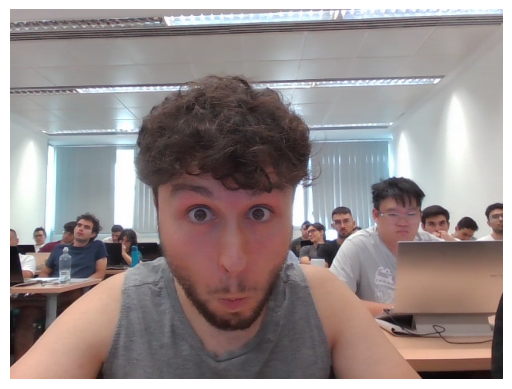

In [161]:
ret, frame = cap.read()
cap.release()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.show()
else:
    print("Image capture failed.")


0: 480x640 11 faces, 65.1ms
Speed: 0.8ms preprocess, 65.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


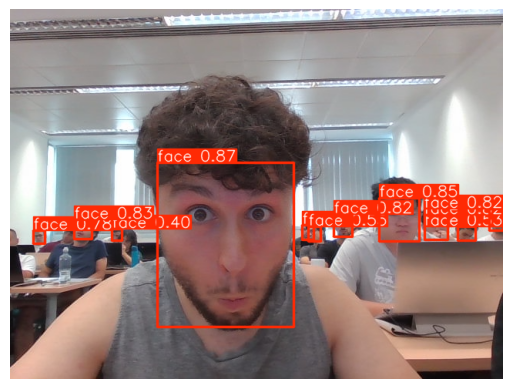

In [162]:
results = face_detector(frame_rgb)

cropped_faces = []

for result in results:
    annotated_frame = result.plot()
    plt.imshow(annotated_frame)
    plt.axis("off")
    plt.show()

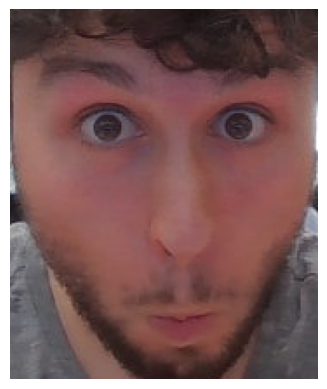

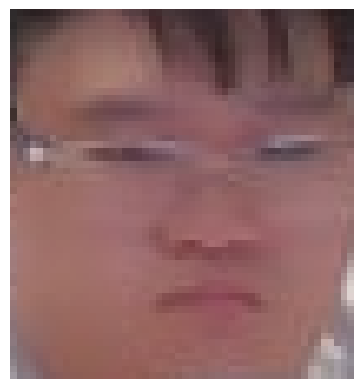

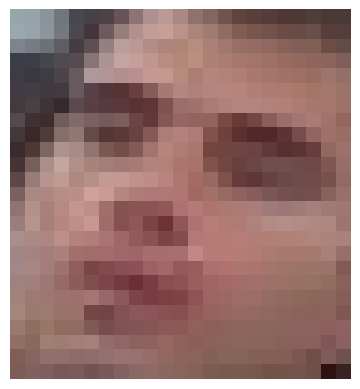

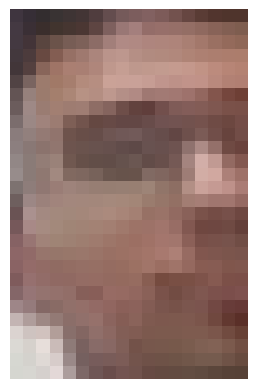

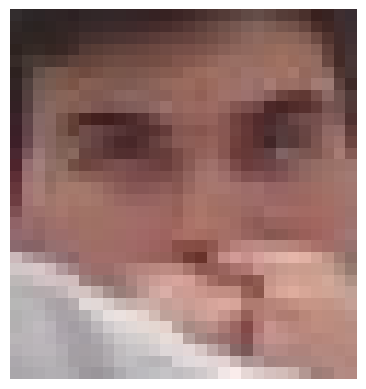

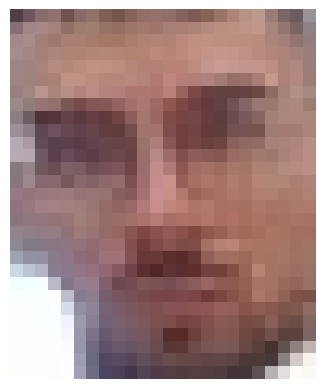

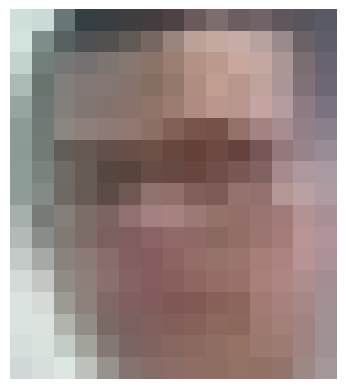

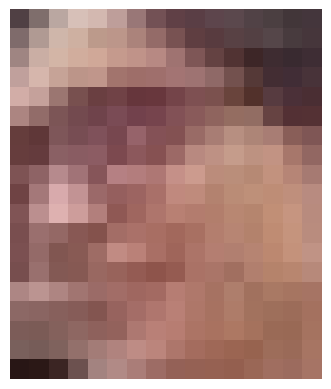

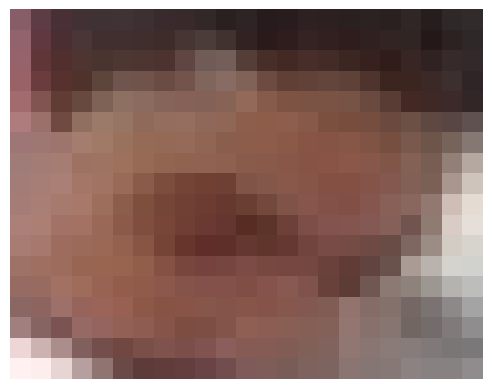

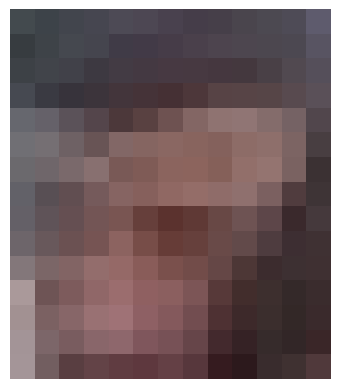

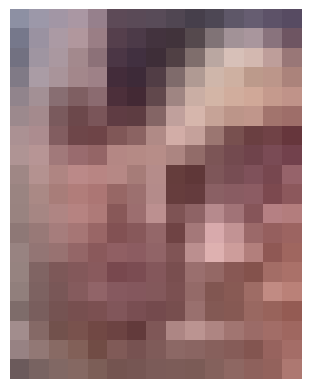

In [163]:
cropped_faces = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cropped_face = frame_rgb[y1:y2, x1:x2]
        cropped_faces.append(cropped_face)
        plt.imshow(cropped_face)
        plt.axis("off")
        plt.show()


0: 224x224 Non Drowsy 0.99, Drowsy 0.01, 3.0ms
1: 224x224 Drowsy 0.90, Non Drowsy 0.10, 3.0ms
2: 224x224 Drowsy 0.90, Non Drowsy 0.10, 3.0ms
3: 224x224 Drowsy 0.55, Non Drowsy 0.45, 3.0ms
4: 224x224 Drowsy 0.95, Non Drowsy 0.05, 3.0ms
5: 224x224 Drowsy 0.66, Non Drowsy 0.34, 3.0ms
6: 224x224 Non Drowsy 0.83, Drowsy 0.17, 3.0ms
7: 224x224 Drowsy 0.65, Non Drowsy 0.35, 3.0ms
8: 224x224 Drowsy 0.61, Non Drowsy 0.39, 3.0ms
9: 224x224 Non Drowsy 0.82, Drowsy 0.18, 3.0ms
10: 224x224 Drowsy 0.76, Non Drowsy 0.24, 3.0ms
Speed: 0.9ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


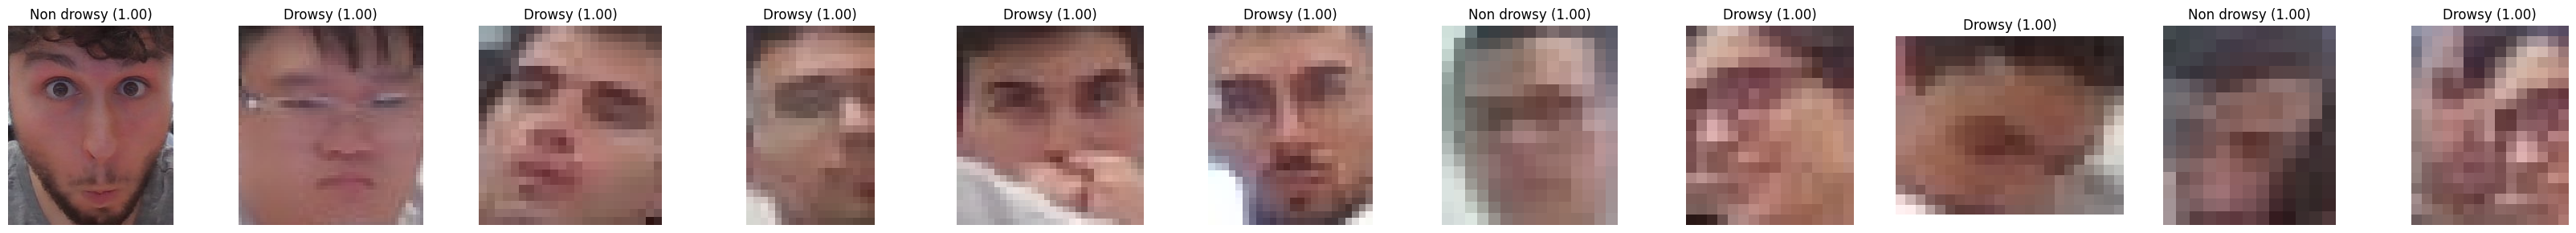

In [164]:
results = drowsiness_detector(cropped_faces)

labels = ["Drowsy", "Non drowsy"]

n = len(results)
fig, axes = plt.subplots(1, n, figsize=(3 * n, 3))
if n == 1:
    axes = [axes]

for ax, element, img in zip(axes, results, cropped_faces):
    top1 = element.probs.top1
    prob_val = float(top1)

    title = f"{labels[0]} ({1 - prob_val:.2f})" if prob_val < 0.5 else f"{labels[1]} ({prob_val:.2f})"
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()